In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
pd.set_option('display.expand_frame_repr', True)

In [4]:
# read the day.csv file and assigning a dataframe bike.

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# shape of dataset
bike.shape

(730, 16)

In [6]:
# information of dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# check the statstics of numerical columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### insight
all the columns in given dataset are of numerical type, but from the  provided data dictionary we have found that there are some columns which categorical types and binary types.

Numeric types: temp, atemp,hum , windspeed, cnt, casual, registered.         
Binary Types : yr, holiday, workingday.                                     
Categorical Types: season, month, weekday, Weathersit


In [8]:
# rename columns for better understanding
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity',
                     'weathersit':'weather','cnt':'Count'}, inplace=True)

In [9]:
# create a new dataset(bike_n) with necessary columns 
new_col_list = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'atemp', 
            'humidity', 'windspeed','Count']

bike_n = bike[new_col_list]
bike_n.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Exploratary Data Analysis



In [10]:
#import libraries for EDA

import matplotlib.pyplot as plt
import seaborn as sns

### Categorical Variables

In [11]:
# add dummy variables to season columns for better understanding
# season (1:spring, 2:summer, 3:fall, 4:winter)

bike_n.season = bike_n.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike_n.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,Count
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


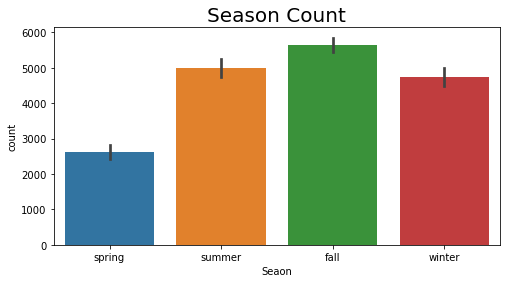

In [12]:
# Visualising seasons count of rented bikes

plt.figure(figsize=[8,4])
sns.barplot(bike_n.season,bike_n.Count)
plt.xlabel('Seaon')
plt.ylabel('count')
plt.title('Season Count', fontsize = 20)
plt.show()

### Insight
from above barplot we conclude that 
      (i) highest demand of bikes in fall season.
      (ii)least demand in the spring season.

In [13]:
# mapping year varible proper names for better understanding

bike_n.year= bike_n.year.map({0:'2018',1:'2019'})

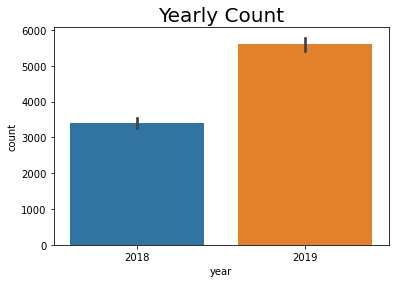

In [14]:
# Visualising Yearly count of rented bikes

sns.barplot(bike_n.year, bike_n.Count)
plt.xlabel('year')
plt.ylabel('count')
plt.title('Yearly Count', fontsize = 20)
plt.show()

## Insight
Demand of bikes in 2019  is approximately  twice the year 2018

In [15]:
# add dummy variables to  Month column for better understanding

bike_n.month = bike_n.month.map({1:'January',2:'Febuary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

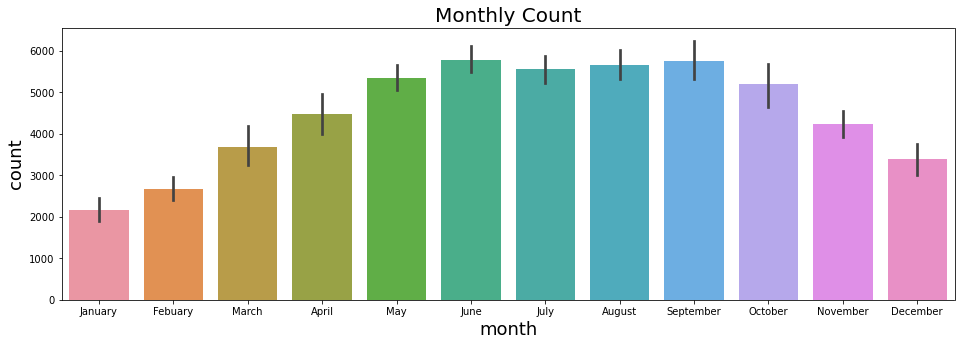

In [16]:
# Visualising Monthly count of rented bikes

plt.figure(figsize=[16,5])

sns.barplot(bike_n.month,bike_n.Count)
plt.ylabel("count",fontsize=18)
plt.xlabel("month",fontsize=18)
plt.title('Monthly Count', fontsize = 20)
plt.show()

from above barplot we conclude that
  (i) maximum and approximately same demand in august, june, july and september 
      follwed by october, may, november, april
   (ii) least demand in december, february and january

In [17]:
bike_n.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,Count
0,spring,2018,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# add dummy variable to weekday column for better understanding

bike_n['weekday'] = bike_n['weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})



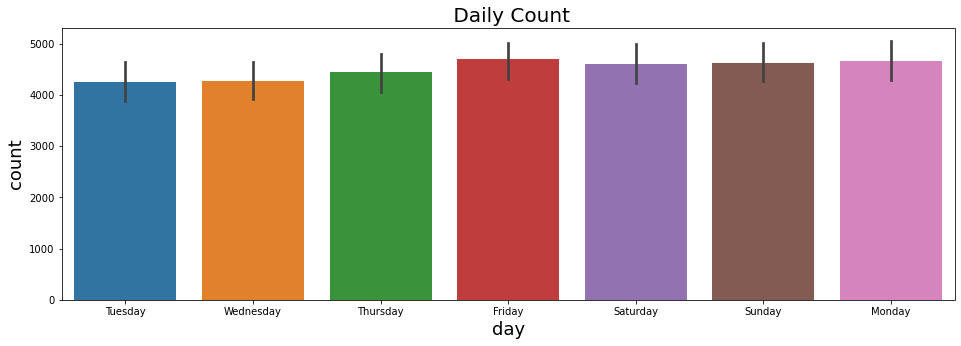

In [19]:
# Visualising total Daily count of rented bikes

plt.figure(figsize=[16,5])
sns.barplot(bike_n['weekday'],bike_n['Count'])
plt.title(' Daily Count', fontsize = 20)
plt.ylabel("count",fontsize=18)
plt.xlabel("day",fontsize=18)
plt.show()

### Insights
    approximately same demand on all days but still least on tuseday and maximum on friday

In [20]:
# add dummy variable to workingday column for better understanding

bike_n['workingday'] = bike_n['workingday'].map({0:'no',1:'yes'})

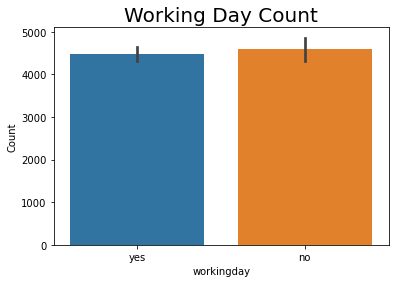

In [21]:
# Visualising Working day count of rented bikes

sns.barplot(bike_n['workingday'],bike_n['Count'])

plt.title('Working Day Count', fontsize = 20)
plt.show()

### insight
    demand of bikes are almost same, whether it's working day or not.

In [22]:
# add dummy variable to weathersit column for better understanding

# weathersit :- 
# 1. Clear, Few clouds, Partly cloudy   = Good
# 2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate
# 3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  = Bad
# 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse

bike_n['weather'] = bike_n['weather'].map({1:"Good",2:'Moderate',3:'Bad',4:'Worse'})

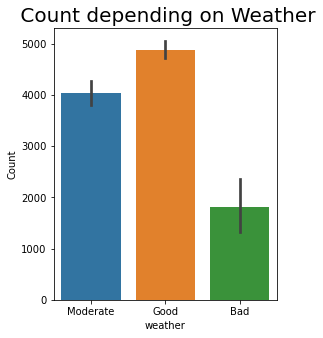

In [23]:
# Visualising  count of rented bikes on basis of weather conditions

plt.figure(figsize=[4,5])
sns.barplot(bike_n['weather'],bike_n['Count'])
plt.title(' Count depending on Weather', fontsize = 20)
plt.show()

### insight
    (i) as expected, maximum demand on good weather day
    (ii) least demand on bad weather day

In [24]:
# add dummy variables to holiday column for better understanding

bike_n['holiday'] = bike_n['holiday'].map({0:'No',1:'Yes'})

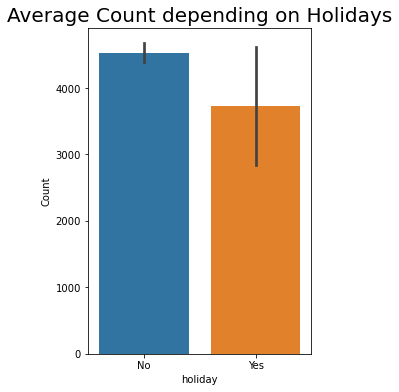

In [25]:
# Visualising Holiday wise count of rented bikes
plt.figure(figsize=[4,6])
sns.barplot(bike_n['holiday'],bike_n['Count'])
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

## insight
     on holidaqy, there is high decrease in demand

In [26]:
bike_n.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,Count
0,spring,2018,January,No,Tuesday,yes,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,No,Wednesday,yes,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,No,Thursday,yes,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,No,Friday,yes,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,No,Saturday,yes,Good,9.305237,11.46350,43.6957,12.522300,1600


## Numerical variable

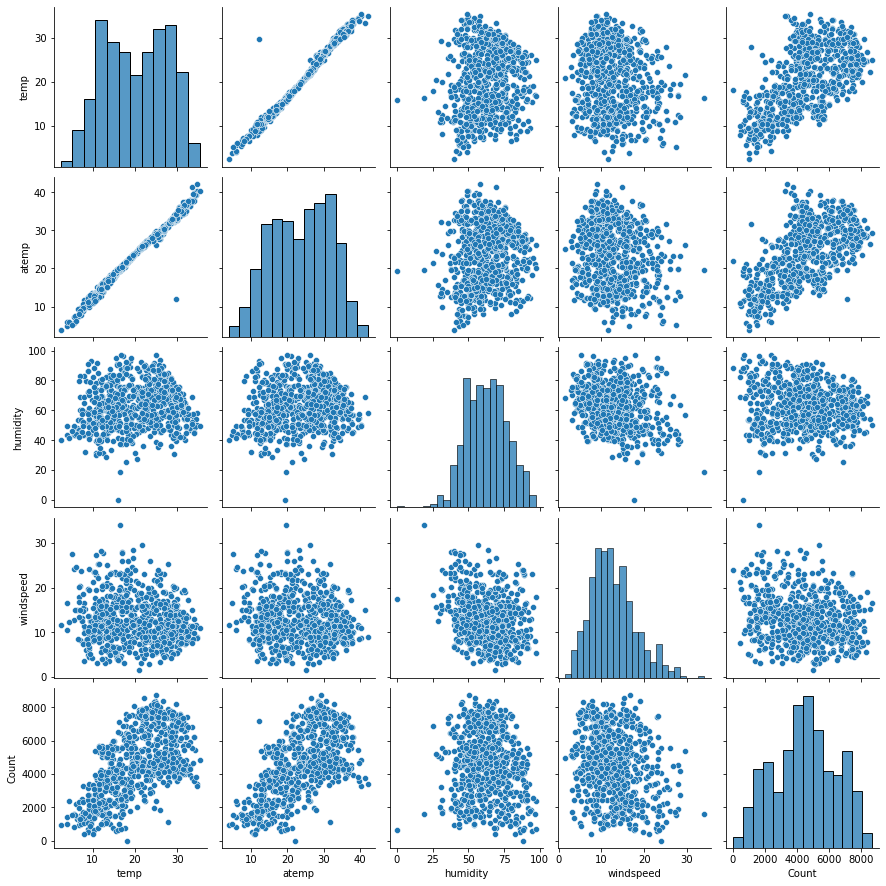

In [27]:
# ploting pairplot of all numeric variables
sns.pairplot(bike_n)
plt.show()

# Data Prepration

In [28]:
# creating a list and putting all category columns in to it and converting them to category data type

col = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

In [29]:
# for Linear model creating dummies

d_set = pd.get_dummies(bike_n[col], drop_first=True)
d_set.head()

,season_spring,season_summer,season_winter,year_2019,month_August,month_December,month_Febuary,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_yes,weather_Good,weather_Moderate
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [30]:
# concatenate both dataframes bike_n1 and dummy variable dataframe i.e. d_set
bike_n1= pd.concat([bike_n,d_set],axis=1)

In [31]:
bike_n1.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,Count,season_spring,season_summer,season_winter,year_2019,month_August,month_December,month_Febuary,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_yes,weather_Good,weather_Moderate
0,spring,2018,January,No,Tuesday,yes,Moderate,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,spring,2018,January,No,Wednesday,yes,Moderate,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,spring,2018,January,No,Thursday,yes,Good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,spring,2018,January,No,Friday,yes,Good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,spring,2018,January,No,Saturday,yes,Good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [32]:
# dropping those columns for which dummy variables were created
bike_n1.drop(col, axis=1, inplace = True)

In [33]:
bike_n1.head()

,temp,atemp,humidity,windspeed,Count,season_spring,season_summer,season_winter,year_2019,month_August,month_December,month_Febuary,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_yes,weather_Good,weather_Moderate
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [34]:
bike_n1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               730 non-null    float64
 1   atemp              730 non-null    float64
 2   humidity           730 non-null    float64
 3   windspeed          730 non-null    float64
 4   Count              730 non-null    int64  
 5   season_spring      730 non-null    uint8  
 6   season_summer      730 non-null    uint8  
 7   season_winter      730 non-null    uint8  
 8   year_2019          730 non-null    uint8  
 9   month_August       730 non-null    uint8  
 10  month_December     730 non-null    uint8  
 11  month_Febuary      730 non-null    uint8  
 12  month_January      730 non-null    uint8  
 13  month_July         730 non-null    uint8  
 14  month_June         730 non-null    uint8  
 15  month_March        730 non-null    uint8  
 16  month_May          730 non

# train  test split

In [35]:
# import libraries for linear model building
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [36]:
#split the dataset into train and test dataset
bike_train,bike_test = train_test_split(bike_n1, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
bike_train.head()

,temp,atemp,humidity,windspeed,Count,season_spring,season_summer,season_winter,year_2019,month_August,month_December,month_Febuary,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_yes,weather_Good,weather_Moderate
653,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
576,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
426,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
728,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
482,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


# scaling

## Rescaling 
#### rescaling numerical feature using normalization method or MinMaxscaler method

In [38]:
scaler= MinMaxScaler()
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'Count']
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])

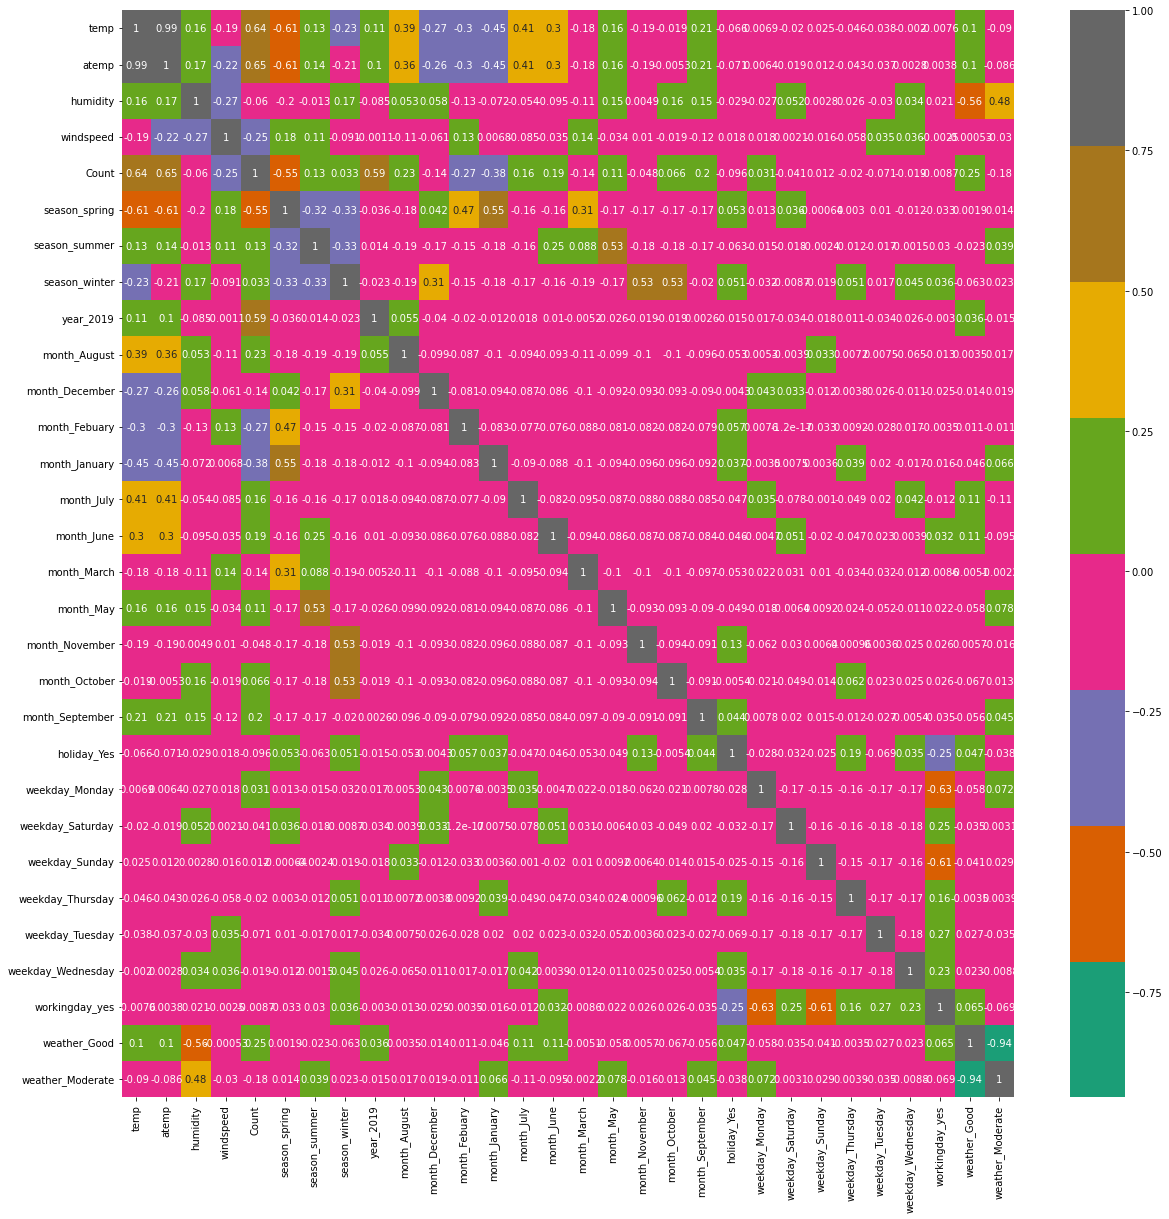

In [39]:
# plot heatmap to find out the correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(bike_train.corr(),annot=True, cmap='Dark2')
plt.show()

#### insight
   from above  heatmap, it is very evident that varibles are multicorrelated with each other 

# model building

In [40]:
# dividing train set into X and y set for model building
ytrain=bike_train.pop('Count')
Xtrain=bike_train

### for model building we are using Mix approch, first build a model with 15 variables using RFE approch then by visualizing statstics of them drop insignificant varibles

In [41]:
#import libraries for building model using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(Xtrain, ytrain)


In [43]:
# create a list of variables, selecting by RFE method
list(zip(Xtrain.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_August', False, 10),
 ('month_December', True, 1),
 ('month_Febuary', False, 2),
 ('month_January', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 14),
 ('month_March', False, 15),
 ('month_May', False, 7),
 ('month_November', True, 1),
 ('month_October', False, 12),
 ('month_September', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Monday', False, 5),
 ('weekday_Saturday', False, 13),
 ('weekday_Sunday', False, 4),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 8),
 ('workingday_yes', False, 3),
 ('weather_Good', True, 1),
 ('weather_Moderate', True, 1)]

In [44]:
col = Xtrain.columns[rfe.support_]
col

Index(['temp', 'humidity', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'year_2019', 'month_December', 'month_January', 'month_July', 'month_November', 'month_September', 'holiday_Yes', 'weather_Good', 'weather_Moderate'], dtype='object')

## Model 1 

In [45]:
# import library for statsitical function
import statsmodels.api as sm

In [46]:
# add constant column to the train dataset
Xtrain_lm = sm.add_constant(Xtrain[col])

In [47]:
# create first fit model using least square method
lr= sm.OLS(ytrain,Xtrain_lm).fit()

In [48]:
# check the parameters of variables
lr.params

const               0.072127
temp                0.479977
humidity           -0.160227
windspeed          -0.188457
season_spring      -0.061737
season_summer       0.040767
season_winter       0.103435
year_2019           0.230328
month_December     -0.037199
month_January      -0.043748
month_July         -0.055495
month_November     -0.040949
month_September     0.074891
holiday_Yes        -0.091228
weather_Good        0.248116
weather_Moderate    0.192240
dtype: float64

In [49]:
#
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.34e-189
Time:                        14:43:22   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0721      0.047      1.519      0.129      -0.021       0.165
temp                 0.4800      0.037     12.977      0.000       0.407       0.553
humidity            -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed           -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring       -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer        0.0408      0.015      2.659      0.008       0.011       0.071
season_winter        0.1034      0.018      5.763      0.000       0.068       0.139
year_2019            0.2303      0.008     28.511      0.000       0.214       0.246
month_December      -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_January       -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_July          -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_November      -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_September      0.0749      0.017      4.438      0.000       0.042       0.108
holiday_Yes         -0.0912      0.026     -3.566      0.000      -0.141      -0.041
weather_Good         0.2481      0.026      9.402      0.000       0.196       0.300
weather_Moderate     0.1922      0.025      7.697      0.000       0.143       0.241
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# import library to check VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# create a new data set with the columns selected by rfe
Xtrain_rfe = Xtrain[col]
Xtrain_rfe.head()

,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_December,month_January,month_July,month_November,month_September,holiday_Yes,weather_Good,weather_Moderate
653,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,1,0
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,0,1,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,1,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,1


In [52]:
# create dataframe which contain names and VIf values of variables
vif = pd.DataFrame()
vif['feature']=Xtrain_rfe.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe.values,i) for i in range(Xtrain_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=True)
vif

,feature,VIF
12,holiday_Yes,1.06
11,month_September,1.43
9,month_July,1.60
7,month_December,1.61
8,month_January,1.81
10,month_November,1.89
6,year_2019,2.10
4,season_summer,3.28
5,season_winter,4.54
2,windspeed,4.67


##### vif value of humidity is highest (vif>5) so we can drop that  column and create a new model say model 2 

# Model 2

In [53]:
# create a new dataset
Xtrain_rfe2 = Xtrain_rfe.drop('humidity',axis=1)
# add constant column
Xtrain_lm2= sm.add_constant(Xtrain_rfe2)
# create first fit model using OLS method
lr2=sm.OLS(ytrain,Xtrain_lm2).fit()
# view summary
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.57e-186
Time:                        14:43:22   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0463      0.039     -1.184      0.237      -0.123       0.030
temp                 0.4377      0.036     12.083      0.000       0.366       0.509
windspeed           -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring       -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer        0.0333      0.015      2.148      0.032       0.003       0.064
season_winter        0.0887      0.018      4.951      0.000       0.053       0.124
year_2019            0.2343      0.008     28.709      0.000       0.218       0.250
month_December      -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_January       -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_July          -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_November      -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_September      0.0682      0.017      3.992      0.000       0.035       0.102
holiday_Yes         -0.0919      0.026     -3.533      0.000      -0.143      -0.041
weather_Good         0.2929      0.025     11.908      0.000       0.245       0.341
weather_Moderate     0.2114      0.025      8.466      0.000       0.162       0.261
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# create dataframe which contain names and VIf values of variables
vif = pd.DataFrame()
vif['feature']=Xtrain_rfe2.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe2.values,i) for i in range(Xtrain_rfe2.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=True)
vif

,feature,VIF
11,holiday_Yes,1.06
10,month_September,1.37
6,month_December,1.55
8,month_July,1.60
7,month_January,1.74
9,month_November,1.87
5,year_2019,2.08
3,season_summer,2.76
4,season_winter,3.36
2,season_spring,4.40


##### weather_good  has highest value of VIF but we can not drop it because from data expolatory  analysis we found that good_weather plays a good role in demands so we drop weather moderate which has the second highest  VIF value

# Model 3

In [60]:
# create a new dataset
Xtrain_rfe3 = Xtrain_rfe2.drop('weather_Moderate',axis=1)
# add constant column
Xtrain_lm3= sm.add_constant(Xtrain_rfe3)
# create first fit model using OLS method
lr3=sm.OLS(ytrain,Xtrain_lm3).fit()
# view summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     170.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.42e-173
Time:                        15:10:53   Log-Likelihood:                 471.13
No. Observations:                 510   AIC:                            -914.3
Df Residuals:                     496   BIC:                            -855.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1445      0.034      4.237      0.000       0.077       0.211
temp                0.4509      0.039     11.657      0.000       0.375       0.527
windspeed          -0.1799      0.027     -6.708      0.000      -0.233      -0.127
season_spring      -0.0666      0.023     -2.904      0.004      -0.112      -0.022
season_summer       0.0388      0.017      2.343      0.020       0.006       0.071
season_winter       0.0795      0.019      4.161      0.000       0.042       0.117
year_2019           0.2378      0.009     27.298      0.000       0.221       0.255
month_December     -0.0335      0.019     -1.781      0.076      -0.071       0.003
month_January      -0.0413      0.020     -2.109      0.035      -0.080      -0.003
month_July         -0.0558      0.020     -2.824      0.005      -0.095      -0.017
month_November     -0.0321      0.020     -1.582      0.114      -0.072       0.008
month_September     0.0662      0.018      3.623      0.000       0.030       0.102
holiday_Yes        -0.0875      0.028     -3.149      0.002      -0.142      -0.033
weather_Good        0.0975      0.009     10.738      0.000       0.080       0.115
==============================================================================
Omnibus:                      102.029   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.598
Skew:                          -0.913   Prob(JB):                     5.99e-73
Kurtosis:                       6.510   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# create dataframe which contain names and VIf values of variables
vif = pd.DataFrame()
vif['feature']=Xtrain_rfe3.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe3.values,i) for i in range(Xtrain_rfe3.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=True)
vif

,feature,VIF
11,holiday_Yes,1.06
10,month_September,1.34
6,month_December,1.46
8,month_July,1.59
7,month_January,1.64
9,month_November,1.80
5,year_2019,2.07
3,season_summer,2.20
12,weather_Good,2.75
4,season_winter,2.85


 from  model 3 summary we found that month_november has highest p value so we have to drop it

# Model 4

In [62]:
# create a new dataset
Xtrain_rfe4 = Xtrain_rfe3.drop('month_November',axis=1)
# add constant column
Xtrain_lm4= sm.add_constant(Xtrain_rfe4)
# create first fit model using OLS method
lr4=sm.OLS(ytrain,Xtrain_lm4).fit()
# view summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          8.55e-174
Time:                        15:14:31   Log-Likelihood:                 469.84
No. Observations:                 510   AIC:                            -913.7
Df Residuals:                     497   BIC:                            -858.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1316      0.033      3.968      0.000       0.066       0.197
temp                0.4666      0.037     12.462      0.000       0.393       0.540
windspeed          -0.1803      0.027     -6.715      0.000      -0.233      -0.128
season_spring      -0.0601      0.023     -2.658      0.008      -0.104      -0.016
season_summer       0.0432      0.016      2.643      0.008       0.011       0.075
season_winter       0.0720      0.019      3.885      0.000       0.036       0.108
year_2019           0.2377      0.009     27.243      0.000       0.221       0.255
month_December     -0.0219      0.017     -1.261      0.208      -0.056       0.012
month_January      -0.0375      0.019     -1.924      0.055      -0.076       0.001
month_July         -0.0556      0.020     -2.811      0.005      -0.094      -0.017
month_September     0.0706      0.018      3.908      0.000       0.035       0.106
holiday_Yes        -0.0929      0.028     -3.361      0.001      -0.147      -0.039
weather_Good        0.0967      0.009     10.652      0.000       0.079       0.115
==============================================================================
Omnibus:                       94.870   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.660
Skew:                          -0.869   Prob(JB):                     1.26e-63
Kurtosis:                       6.257   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# create dataframe which contain names and VIf values of variables
vif = pd.DataFrame()
vif['feature']=Xtrain_rfe4.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe4.values,i) for i in range(Xtrain_rfe4.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=True)
vif

,feature,VIF
10,holiday_Yes,1.04
6,month_December,1.29
9,month_September,1.33
8,month_July,1.59
7,month_January,1.64
4,season_winter,2.01
5,year_2019,2.07
3,season_summer,2.20
11,weather_Good,2.73
2,season_spring,2.96


from model 4 summary we found that month_december has highest p value so we have to drop it

# model 5

In [64]:
# create a new dataset
Xtrain_rfe5 = Xtrain_rfe4.drop('month_December',axis=1)
# add constant column
Xtrain_lm5= sm.add_constant(Xtrain_rfe5)
# create first fit model using OLS method
lr5=sm.OLS(ytrain,Xtrain_lm5).fit()
# view summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     199.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.30e-174
Time:                        15:17:51   Log-Likelihood:                 469.03
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     498   BIC:                            -863.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1217      0.032      3.775      0.000       0.058       0.185
temp                0.4774      0.036     13.093      0.000       0.406       0.549
windspeed          -0.1767      0.027     -6.614      0.000      -0.229      -0.124
season_spring      -0.0589      0.023     -2.608      0.009      -0.103      -0.015
season_summer       0.0455      0.016      2.801      0.005       0.014       0.077
season_winter       0.0708      0.019      3.820      0.000       0.034       0.107
year_2019           0.2377      0.009     27.226      0.000       0.221       0.255
month_January      -0.0322      0.019     -1.692      0.091      -0.070       0.005
month_July         -0.0559      0.020     -2.826      0.005      -0.095      -0.017
month_September     0.0724      0.018      4.013      0.000       0.037       0.108
holiday_Yes        -0.0918      0.028     -3.322      0.001      -0.146      -0.038
weather_Good        0.0966      0.009     10.630      0.000       0.079       0.114
==============================================================================
Omnibus:                       92.421   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.443
Skew:                          -0.854   Prob(JB):                     9.36e-61
Kurtosis:                       6.177   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# create dataframe which contain names and VIf values of variables
vif = pd.DataFrame()
vif['feature']=Xtrain_rfe5.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe5.values,i) for i in range(Xtrain_rfe5.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=True)
vif

,feature,VIF
9,holiday_Yes,1.04
8,month_September,1.33
7,month_July,1.59
6,month_January,1.60
4,season_winter,1.75
5,year_2019,2.07
3,season_summer,2.20
10,weather_Good,2.72
2,season_spring,2.84
1,windspeed,4.56


from model 5 summary we found that month_january has highest p value so we have to drop it

# model 6


In [69]:
# create a new dataset
Xtrain_rfe6 = Xtrain_rfe5.drop('month_January',axis=1)
# add constant column
Xtrain_lm6= sm.add_constant(Xtrain_rfe6)
# create first fit model using OLS method
lr6=sm.OLS(ytrain,Xtrain_lm6).fit()
# view summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     218.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.56e-175
Time:                        15:22:34   Log-Likelihood:                 467.57
No. Observations:                 510   AIC:                            -913.1
Df Residuals:                     499   BIC:                            -866.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1077      0.031      3.449      0.001       0.046       0.169
temp                0.4933      0.035     13.973      0.000       0.424       0.563
windspeed          -0.1706      0.027     -6.433      0.000      -0.223      -0.119
season_spring      -0.0635      0.022     -2.829      0.005      -0.108      -0.019
season_summer       0.0481      0.016      2.967      0.003       0.016       0.080
season_winter       0.0759      0.018      4.148      0.000       0.040       0.112
year_2019           0.2370      0.009     27.128      0.000       0.220       0.254
month_July         -0.0573      0.020     -2.893      0.004      -0.096      -0.018
month_September     0.0728      0.018      4.029      0.000       0.037       0.108
holiday_Yes        -0.0925      0.028     -3.340      0.001      -0.147      -0.038
weather_Good        0.0972      0.009     10.686      0.000       0.079       0.115
==============================================================================
Omnibus:                       92.061   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.825
Skew:                          -0.850   Prob(JB):                     1.27e-60
Kurtosis:                       6.177   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# create dataframe which contain names and VIf values of variables
vif = pd.DataFrame()
vif['feature']=Xtrain_rfe6.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe6.values,i) for i in range(Xtrain_rfe6.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=True)
vif

,feature,VIF
8,holiday_Yes,1.04
7,month_September,1.32
6,month_July,1.59
4,season_winter,1.75
5,year_2019,2.06
2,season_spring,2.12
3,season_summer,2.18
9,weather_Good,2.72
1,windspeed,4.55
0,temp,5.75


##### as temp has maximum vif value but we can not drop it because it plays a major role 

<AxesSubplot:>

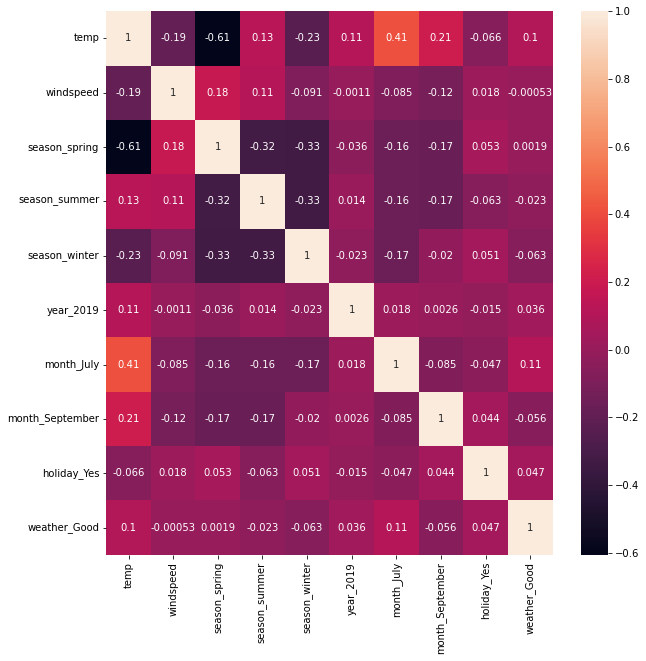

In [81]:
# plot heatmap to find out collinearity between variables of model 6
plt.figure(figsize=(10,10))
sns.heatmap(Xtrain_rfe6.corr(), annot=True)

from above heatmap it is clearly evident that season_spring is negatively correlated with temp and month_july is highly correlated with temp so we have to drop them

# Model 7

In [84]:
# create a new dataset
Xtrain_rfe7 = Xtrain_rfe6.drop(['season_spring','month_July'],axis=1)
# add constant column
Xtrain_lm7= sm.add_constant(Xtrain_rfe7)
# create first fit model using OLS method
lr7=sm.OLS(ytrain,Xtrain_lm7).fit()
# view summary
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     265.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.09e-174
Time:                        15:41:48   Log-Likelihood:                 460.69
No. Observations:                 510   AIC:                            -903.4
Df Residuals:                     501   BIC:                            -865.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0408      0.018      2.290      0.022       0.006       0.076
temp                0.5428      0.021     25.564      0.000       0.501       0.585
windspeed          -0.1756      0.027     -6.564      0.000      -0.228      -0.123
season_summer       0.0890      0.011      8.021      0.000       0.067       0.111
season_winter       0.1218      0.011     11.020      0.000       0.100       0.143
year_2019           0.2365      0.009     26.816      0.000       0.219       0.254
month_September     0.0976      0.017      5.760      0.000       0.064       0.131
holiday_Yes        -0.0934      0.028     -3.335      0.001      -0.148      -0.038
weather_Good        0.0953      0.009     10.379      0.000       0.077       0.113
==============================================================================
Omnibus:                       88.269   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.975
Skew:                          -0.853   Prob(JB):                     5.74e-52
Kurtosis:                       5.862   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# create dataframe which contain names and VIf values of variables
vif = pd.DataFrame()
vif['feature']=Xtrain_rfe7.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_rfe6.values,i) for i in range(Xtrain_rfe7.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=True)
vif

,feature,VIF
7,weather_Good,1.32
6,holiday_Yes,1.59
4,year_2019,1.75
5,month_September,2.06
2,season_summer,2.12
3,season_winter,2.18
1,windspeed,4.55
0,temp,5.75


<AxesSubplot:>

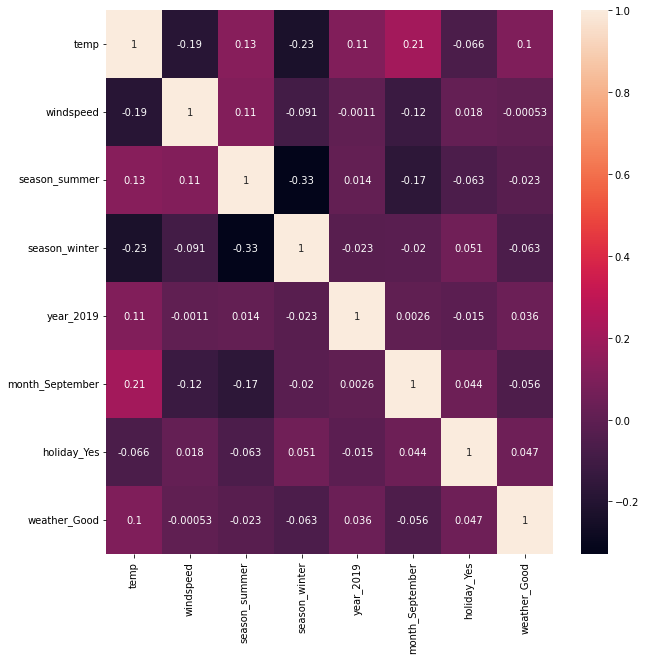

In [86]:
# plot heatmap to find out collinearity between variables of model 7
plt.figure(figsize=(10,10))
sns.heatmap(Xtrain_rfe7.corr(), annot=True)

Model 7 looks good because in this model p value and VIF value of all predictor variables are quit significant. also there is quite low collinearity between predictor variables.                                
model 7 is the final model

In [87]:
lr7.params

const              0.040798
temp               0.542823
windspeed         -0.175609
season_summer      0.088988
season_winter      0.121753
year_2019          0.236508
month_September    0.097640
holiday_Yes       -0.093357
weather_Good       0.095313
dtype: float64

## INSIGHT
from above we conclude that all the cofficent of predictors are non zero hence we  rejected null hypothesis i.e. HO :- Bi=0

from  summary of model 7 we found that p-values of predictor is zero or approximately zero,  F-statistic= 265.3 which is greater than 1 hence model 7 is significant

## Equation of best fitted model 7 is
Count= 0.040798+(temp*0.542823)-(windspeed*0.175609)+       (season_summer*0.088988)+(season_winter*0.121753)+(year_2019*0.236508)+(month_September*0.097640)-(holiday_Yes*0.093357)+(weather_Good*0.095313)



## Interpretation of Coefficients:
constant : The Constant value of ‘0.040798’ indicates that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike demand still increases by 0.040798 units.

𝑡𝑒𝑚𝑝: A coefficient value of ‘0.542823’ indicates that, a unit increase in temp variable, increases the bike demand by 0.542823 units.

𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑: A coefficient value of ‘-0.175609’ indicates that a unit decrease in windspeed variable, decreases bike demand by 0.175609 units.

s𝑒𝑎𝑠𝑜𝑛_𝑠𝑢𝑚𝑚𝑒𝑟: A coefficient value of ‘0.088988’ indicates that a unit increase in season_summer variable, increases bike demand by 0.088988 units.

s𝑒𝑎𝑠𝑜𝑛_𝑤𝑖𝑛𝑡𝑒𝑟: A coefficient value of ‘0.121753’ indicates that a unit increase in Season_winter variable, increases bike demand by 0.121753 units.

y𝑒𝑎𝑟_2019: A coefficient value of ‘0.236508’ indicates that a unit increase in Year_2019 variable, increases the bike demand by 0.236508 units.

m𝑜𝑛𝑡ℎ_𝑆𝑒𝑝𝑡ember: A coefficient value of ‘0.097640’ indicates that a unit increase in month_September variable, increases the bike demand by 0.097640 units.

ℎ𝑜𝑙𝑖𝑑𝑎𝑦_𝑌𝑒𝑠: A coefficient value of ‘-0.093357’ indicates that a unit decrease in holiday_Yes variable, decreases bike demand by 0.093357 units.

w𝑒𝑎𝑡ℎ𝑒𝑟_𝐺𝑜𝑜𝑑: A coefficient value of ‘0.095313’ indicates that a unit increase if the weather is good, increases the bike demand by 0.095313 units. A coefficient value of ‘0.542823’ indicates that, a unit increase in temp variable, increases the bike demand by 0.542823 units.

𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑: A coefficient value of ‘-0.175609’ indicates that a unit decrease in windspeed variable, decreases bike demand by 0.175609 units.

s𝑒𝑎𝑠𝑜𝑛_𝑠𝑢𝑚𝑚𝑒𝑟: A coefficient value of ‘0.088988’ indicates that a unit increase in season_summer variable, increases bike demand by 0.088988 units.

s𝑒𝑎𝑠𝑜𝑛_𝑤𝑖𝑛𝑡𝑒𝑟: A coefficient value of ‘0.121753’ indicates that a unit increase in Season_winter variable, increases bike demand by 0.121753 units.

y𝑒𝑎𝑟_2019: A coefficient value of ‘0.236508’ indicates that a unit increase in Year_2019 variable, increases the bike demand by 0.236508 units.

m𝑜𝑛𝑡ℎ_𝑆𝑒𝑝𝑡ember: A coefficient value of ‘0.097640’ indicates that a unit increase in month_September variable, increases the bike demand by 0.097640 units.

ℎ𝑜𝑙𝑖𝑑𝑎𝑦_𝑌𝑒𝑠: A coefficient value of ‘-0.093357’ indicates that a unit decrease in holiday_Yes variable, decreases bike demand by 0.093357 units.

w𝑒𝑎𝑡ℎ𝑒𝑟_𝐺𝑜𝑜𝑑: A coefficient value of ‘0.095313’ indicates that a unit increase if the weather is good, increases the bike demand by 0.095313 units.

# Residual Analysis

In [88]:
# calculate the y_pred of training set
ytrain_pred = lr7.predict(Xtrain_lm7)

In [89]:
#residual calculation
residual = ytrain - ytrain_pred   

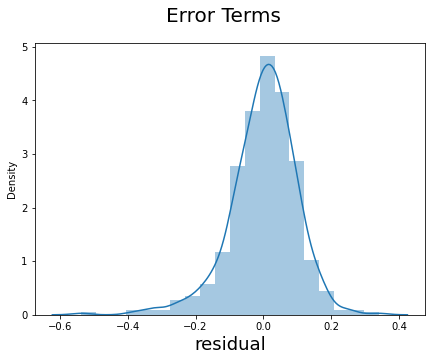

In [93]:
#plot a displot of residusls
fig = plt.figure(figsize=[7,5])
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('residual', fontsize = 18)
plt.show()

From above displot, we conclude that residuals are normaly distributed.

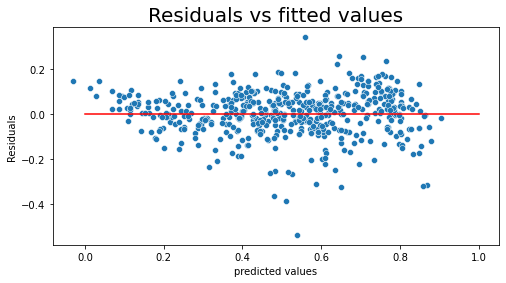

In [95]:
#Check for Homoscedasticity
plt.figure(figsize = [8,4])
p = sns.scatterplot(ytrain_pred,residual)
plt.xlabel('predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values', fontsize = 20)

from this scatter plot, we can see that residuals have approx same variance across regression line

# Making Prediction Using Final Model i.e. Model_7

Very first step is, do same scaling on the test set which we had done in training set. for this we use only transform()

In [96]:
# scaling the test set
bike_test[num_vars]= scaler.transform(bike_test[num_vars])

In [97]:
bike_test.head()

,temp,atemp,humidity,windspeed,Count,season_spring,season_summer,season_winter,year_2019,month_August,month_December,month_Febuary,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_yes,weather_Good,weather_Moderate
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [98]:
bike_test.describe()

,temp,atemp,humidity,windspeed,Count,season_spring,season_summer,season_winter,year_2019,month_August,month_December,month_Febuary,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_yes,weather_Good,weather_Moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.036530,0.155251,0.132420,0.173516,0.155251,0.118721,0.123288,0.639269,0.652968,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.188034,0.362974,0.339723,0.379560,0.362974,0.324202,0.329520,0.481313,0.477117,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# divide test test into X and y
ytest= bike_test.pop('Count')
Xtest=bike_test

In [101]:
#selecting those features which are the part of final model
test_col = Xtrain_rfe7.columns
Xtest=Xtest[test_col]

In [102]:
# add constant to the test set
Xtest_lm7 = sm.add_constant(Xtest)

In [103]:
Xtest_lm7.head()

,const,temp,windspeed,season_summer,season_winter,year_2019,month_September,holiday_Yes,weather_Good
184,1.0,0.831783,0.084219,0,0,0,0,1,0
535,1.0,0.901354,0.153728,1,0,1,0,0,1
299,1.0,0.511964,0.334206,0,1,0,0,0,0
221,1.0,0.881625,0.339570,0,0,0,0,0,1
152,1.0,0.817246,0.537414,1,0,0,0,0,1


In [104]:
# make prediction using final model
ytest_pred= lr7.predict(Xtest_lm7)

# Model Evaluation


Text(0, 0.5, 'ytest_pred')

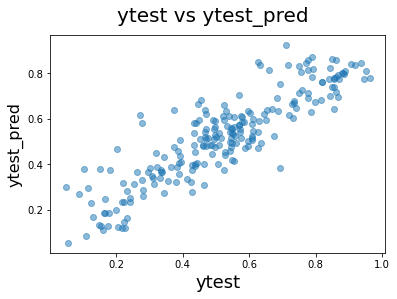

In [105]:
# Plotting ytest and ytest_pred to understand the spread

fig = plt.figure()
plt.scatter(ytest, ytest_pred, alpha=.5)
fig.suptitle('ytest vs ytest_pred', fontsize = 20)        
plt.xlabel('ytest', fontsize = 18)              
plt.ylabel('ytest_pred', fontsize = 16) 

# Residual Analysis

In [107]:
# import library
from sklearn.metrics import r2_score
# calculate r2 values of test and train set
r2_test = r2_score(ytest, ytest_pred)
r2_train = r2_score(ytrain, ytrain_pred)
#print r2 values
print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 78.29
Train data r^2 : 80.9


# Adjusted R^2 Value for TEST
### adj r2 = 1- (1-r2)*(n-1)/(n-p-1)

In [110]:
# n for test data ,n1 for train data is number data points
n = Xtest.shape[0]
n1 = Xtrain_rfe7.shape[0]

# Number of features (predictors) p for test data, p1 for train data is the number of columns
p = Xtest.shape[1]
p1 = Xtrain_rfe7.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 77.46
Train data adjusted r^2 : 80.6


# Comparison
 Test data r^2 : 78.29                                                           
 Train data r^2 : 80.9                                                      
 Test data adjusted r^2 : 77.46                                          
 Train data adjusted r^2 : 80.6                                                   
 from above data is very evident that model 7 is really a good model and it can generalize several dataset

###  As per our final Model, the below predictor variables influences bike booking :

Temperature (temp)                                                          
September Month                                                                   
Year -2019                                                                        
Summer Seaon                                                                    
Winter Seson                                                                                                  
If its a holiday                                                                 
If the weather is good                                                            
Speed of the Wind       